### **KAGGLE: 0.77511**

### **Módulos**

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

### **Datasets**

In [113]:
treino_orig = pd.read_csv('./datasets/train.csv')
holdout_orig = pd.read_csv('./datasets/test.csv')

treino = treino_orig.copy()
holdout = holdout_orig.copy()

### **Filtragem das features**

In [114]:
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [115]:
na = pd.DataFrame()
na['treino'] = (treino.isna().sum() / len(treino.index) * 100)
na['holdout'] = (holdout.isna().sum() / len(holdout.index) * 100)
na.sort_values(['treino','holdout'] ,ascending=False)

,treino,holdout
Cabin,77.104377,78.229665
Age,19.865320,20.574163
Embarked,0.224467,0.000000
Fare,0.000000,0.239234
PassengerId,0.000000,0.000000
Pclass,0.000000,0.000000
Name,0.000000,0.000000
Sex,0.000000,0.000000
SibSp,0.000000,0.000000
Parch,0.000000,0.000000


In [116]:
treino.drop(['Cabin','PassengerId','Name','Ticket','Fare'], axis=1, inplace=True)
holdout.drop(['Cabin','PassengerId','Name','Ticket','Fare'], axis=1, inplace=True)

### **Categorização da idade**

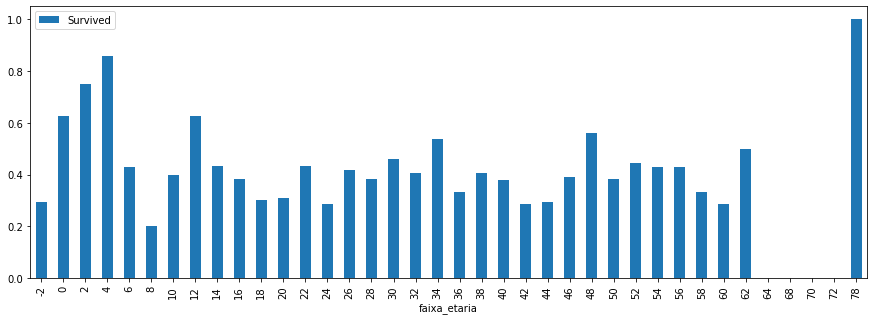

In [117]:
treino['Age'] = treino['Age'].fillna(-1)
holdout['Age'] = holdout['Age'].fillna(-1)

maximo = int(max(treino['Age'].max(), holdout['Age'].max()))
passo = 2
faixas = list(np.arange(-2, maximo+1+passo, passo))

faixas_etarias = faixas[:-1]
faixas_limites = faixas

treino['faixa_etaria'] = pd.cut(treino['Age'], faixas_limites, labels=faixas_etarias)
holdout['faixa_etaria'] = pd.cut(holdout['Age'], faixas_limites, labels=faixas_etarias)

pvt = treino.pivot_table(index='faixa_etaria', values='Survived')
pvt.plot.bar(figsize=(15,5));

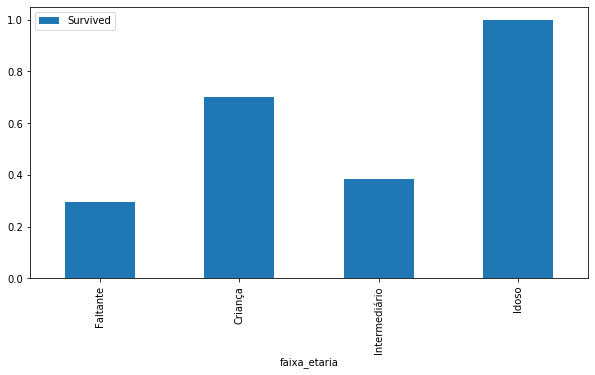

In [118]:
faixas_etarias = ['Faltante','Criança','Intermediário','Idoso']
faixas_limites = [-2,0,6,75,100]

treino['faixa_etaria'] = pd.cut(treino['Age'], faixas_limites, labels=faixas_etarias)
holdout['faixa_etaria'] = pd.cut(holdout['Age'], faixas_limites, labels=faixas_etarias)

pvt = treino.pivot_table(index='faixa_etaria', values='Survived')
pvt.plot.bar(figsize=(10,5));

In [119]:
treino.drop(['Age'], axis=1, inplace=True)
holdout.drop(['Age'], axis=1, inplace=True)

### **Grupo de pessoas / Famílias**

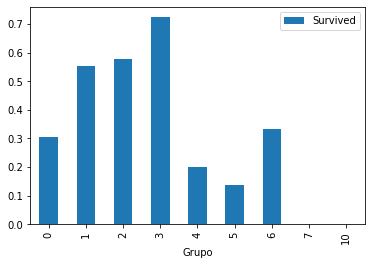

In [120]:
treino['Grupo'] = treino['SibSp'] + treino['Parch']
holdout['Grupo'] = holdout['SibSp'] + holdout['Parch']

treino.pivot_table(index='Grupo', values='Survived').plot.bar();

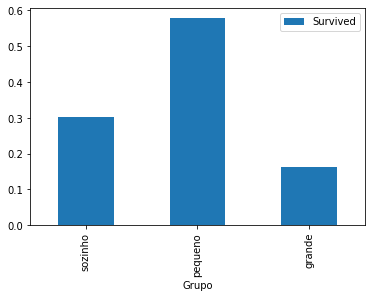

In [121]:
treino['Grupo'] = pd.cut(treino['Grupo'], [-1,0,3,20], labels=['sozinho','pequeno','grande'])
holdout['Grupo'] = pd.cut(holdout['Grupo'], [-1,0,3,20], labels=['sozinho','pequeno','grande'])

treino.pivot_table(index='Grupo', values='Survived').plot.bar();

In [122]:
treino.drop(['SibSp','Parch'], axis=1, inplace=True)
holdout.drop(['SibSp','Parch'], axis=1, inplace=True)

### **Tratamento de "Missing Values"**

In [123]:
na = pd.DataFrame()
na['treino'] = (treino.isna().sum() / len(treino.index) * 100)
na['holdout'] = (holdout.isna().sum() / len(holdout.index) * 100)
na['tipo'] = treino.dtypes
na.sort_values(['treino','holdout'] ,ascending=False)

,treino,holdout,tipo
Embarked,0.224467,0.0,object
Pclass,0.000000,0.0,int64
Sex,0.000000,0.0,object
faixa_etaria,0.000000,0.0,category
Grupo,0.000000,0.0,category
Survived,0.000000,NaN,int64


In [124]:
#holdout['Fare'].fillna(holdout['Fare'].mean(), inplace=True)

treino['Embarked'].fillna(treino['Embarked'].value_counts().index[0], inplace=True)

In [125]:
na['treino'] = (treino.isna().sum() / len(treino.index) * 100)
na['holdout'] = (holdout.isna().sum() / len(holdout.index) * 100)
na['tipo'] = treino.dtypes
na.sort_values(['treino','holdout'] ,ascending=False)

,treino,holdout,tipo
Pclass,0.0,0.0,int64
Sex,0.0,0.0,object
Embarked,0.0,0.0,object
faixa_etaria,0.0,0.0,category
Grupo,0.0,0.0,category
Survived,0.0,NaN,int64


### **Tratamento de features categóricas**

In [126]:
treino.head()

,Survived,Pclass,Sex,Embarked,faixa_etaria,Grupo
0,0,3,male,S,Intermediário,pequeno
1,1,1,female,C,Intermediário,pequeno
2,1,3,female,S,Intermediário,sozinho
3,1,1,female,S,Intermediário,pequeno
4,0,3,male,S,Intermediário,sozinho


In [127]:
treino = pd.get_dummies(treino)
holdout = pd.get_dummies(holdout)
treino.head()

,Survived,Pclass,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,faixa_etaria_Faltante,faixa_etaria_Criança,faixa_etaria_Intermediário,faixa_etaria_Idoso,Grupo_sozinho,Grupo_pequeno,Grupo_grande
0,0,3,0,1,0,0,1,0,0,1,0,0,1,0
1,1,1,1,0,1,0,0,0,0,1,0,0,1,0
2,1,3,1,0,0,0,1,0,0,1,0,1,0,0
3,1,1,1,0,0,0,1,0,0,1,0,0,1,0
4,0,3,0,1,0,0,1,0,0,1,0,1,0,0


### **Split do dataset**

In [128]:
# Separa "features"(X) e "target"(y)
feat = treino.drop('Survived', axis=1)
targ = treino['Survived']

# Faz o split
X_treino, X_teste, y_treino, y_teste = train_test_split(feat, targ, test_size=0.2, random_state=0)

print('Treino:', X_treino.shape, y_treino.shape)
print('Teste:', X_teste.shape, y_teste.shape)
print('Holdout:', holdout.shape)

Treino: (712, 13) (712,)
Teste: (179, 13) (179,)
Holdout: (418, 13)


### **Definindo o modelo, treinando e avaliando o resultado**

In [129]:
modelo = DecisionTreeClassifier(max_depth=3, random_state=0)
modelo.fit(X_treino, y_treino)

feat_imp = pd.DataFrame(list(zip(X_treino, modelo.feature_importances_)))
feat_imp.columns = ['Feature','Importance']
feat_imp.set_index('Feature', inplace=True)
feat_imp.sort_values('Importance', ascending=False)

,Importance
Feature,
Sex_male,0.646467
Pclass,0.184611
Grupo_grande,0.107801
faixa_etaria_Criança,0.061121
Sex_female,0.000000
Embarked_C,0.000000
Embarked_Q,0.000000
Embarked_S,0.000000
faixa_etaria_Faltante,0.000000


### **Predição com o dataset de teste**

In [130]:
pred_teste = modelo.predict(X_teste)
print(pred_teste.shape)
pred_teste

(179,)


array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [131]:
print('Falecidos:',y_teste.value_counts()[0])
print('Sobreviventes:',y_teste.value_counts()[1])

Falecidos: 110
Sobreviventes: 69


In [132]:
conf_mat = confusion_matrix(y_teste, pred_teste)
print('O modelo previu:')
print(f'* {conf_mat[0][0]} falecidos corretamente')
print(f'* {conf_mat[1][1]} sobreviventes corretamente')
print(f'* {conf_mat[0][1]} falecidos como sobreviventes')
print(f'* {conf_mat[1][0]} sobreviventes como falecidos')

O modelo previu:
* 97 falecidos corretamente
* 51 sobreviventes corretamente
* 13 falecidos como sobreviventes
* 18 sobreviventes como falecidos


In [133]:
print(classification_report(y_teste, pred_teste, digits=4, target_names=['Falecidos', 'Sobreviventes']))

               precision    recall  f1-score   support

    Falecidos     0.8435    0.8818    0.8622       110
Sobreviventes     0.7969    0.7391    0.7669        69

     accuracy                         0.8268       179
    macro avg     0.8202    0.8105    0.8146       179
 weighted avg     0.8255    0.8268    0.8255       179



### **Predição com o dataset de holdout**

In [134]:
pred_holdout = modelo.predict(holdout)
print(pred_holdout.shape)
pred_holdout

(418,)


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### **Resultado para submissão**

In [135]:
resultado = pd.DataFrame({'PassengerId': holdout_orig['PassengerId'], 'Survived': pred_holdout})
resultado.set_index('PassengerId', inplace=True)
resultado.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [136]:
t = datetime.now().strftime('%Y%m%d_%H%M')
resultado.to_csv(f'./submissions/titanic_v0.4_{t}.csv')